<a href="https://colab.research.google.com/github/tcbic/DS-Unit-2-Applied-Modeling/blob/master/Unit_2_Sprint_3_Module_4_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Classification last week, but back to a regression problem with the Caterpillar data set this week!

In [0]:
#Let's load our data.

In [77]:
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/caterpillar/caterpillar-tube-pricing.zip

--2019-07-26 04:37:12--  https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/caterpillar/caterpillar-tube-pricing.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 823789 (804K) [application/zip]
Saving to: ‘caterpillar-tube-pricing.zip.2’

caterpillar-tube-pr 100%[===================>] 804.48K  --.-KB/s    in 0.04s   

2019-07-26 04:37:12 (21.4 MB/s) - ‘caterpillar-tube-pricing.zip.2’ saved [823789/823789]



In [78]:
!unzip caterpillar-tube-pricing.zip

Archive:  caterpillar-tube-pricing.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: All
  inflating: sample_submission.csv   
  inflating: data.zip                


In [79]:
!unzip data.zip

Archive:  data.zip
replace competition_data/bill_of_materials.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: All
  inflating: competition_data/bill_of_materials.csv  
  inflating: competition_data/comp_adaptor.csv  
  inflating: competition_data/comp_boss.csv  
  inflating: competition_data/comp_elbow.csv  
  inflating: competition_data/comp_float.csv  
  inflating: competition_data/comp_hfl.csv  
  inflating: competition_data/comp_nut.csv  
  inflating: competition_data/comp_other.csv  
  inflating: competition_data/comp_sleeve.csv  
  inflating: competition_data/comp_straight.csv  
  inflating: competition_data/comp_tee.csv  
  inflating: competition_data/comp_threaded.csv  
  inflating: competition_data/components.csv  
  inflating: competition_data/specs.csv  
  inflating: competition_data/test_set.csv  
  inflating: competition_data/train_set.csv  
  inflating: competition_data/tube.csv  
  inflating: competition_data/tube_end_form.csv  
  inflating: competition_data/type_component.cs

In [80]:
import pandas as pd
from glob import glob    #Included with Python.

for path in glob('competition_data/*.csv'):
    df = pd.read_csv(path)
    print(path, df.shape)

#With so much data, we want to be able to read in the csv files efficiently. How can we best do that?
#We want to read in all the csv files in the folder and get some initial information about it.
#We see that our files really vary in terms of number of rows and columns.

#These files represent relational tables that we'll use to do a bunch of wrangling and try and engineer/select the right features
#that will help us predict the price of the tube assemblies.

competition_data/comp_other.csv (1001, 3)
competition_data/comp_adaptor.csv (25, 20)
competition_data/components.csv (2048, 3)
competition_data/type_end_form.csv (8, 2)
competition_data/tube.csv (21198, 16)
competition_data/comp_elbow.csv (178, 16)
competition_data/type_connection.csv (14, 2)
competition_data/train_set.csv (30213, 8)
competition_data/comp_tee.csv (4, 14)
competition_data/comp_straight.csv (361, 12)
competition_data/comp_float.csv (16, 7)
competition_data/comp_boss.csv (147, 15)
competition_data/comp_hfl.csv (6, 9)
competition_data/comp_nut.csv (65, 11)
competition_data/tube_end_form.csv (27, 2)
competition_data/comp_sleeve.csv (50, 10)
competition_data/test_set.csv (30235, 8)
competition_data/bill_of_materials.csv (21198, 17)
competition_data/comp_threaded.csv (194, 32)
competition_data/specs.csv (21198, 11)
competition_data/type_component.csv (29, 2)


In [0]:
#What metrics are we going to use to measure success. Kaggle tells us that we are going to be evaluated off of RMSLE (Root Mean Squared Logarithmic Error).
#This is a commonly used error metric for regression problems.

RMSLE

In [0]:
#We'll create a function to define RMSLE.

import numpy as np
from sklearn.metrics import mean_squared_log_error

def rmsle(y_true, y_pred):
  return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [0]:
#Determine the evaluation protocol.

In [0]:
#Split the Kaggle data into our training and validation sets.

In [0]:
#Let's take a look at our test set for the Caterpillar competition.

#Are there overlapping date ranges and overlapping tube assemblies from train to test because if train is earlier dates and then test is later dates then we probably want to do a time based split. That's telling
#us that the goal is to forecast out into the future(using earlier information to predict later information). But if the test set has the same date ranges then that is evidently not how this model is being used.

**Does the test set have different dates?**

In [0]:
#Let's read in the train set. We'll end up using the train set to create a validation set as well.

train_and_val = pd.read_csv('competition_data/train_set.csv')

#We'll read in our test set as well.

test = pd.read_csv('competition_data/test_set.csv')

In [87]:
train_and_val.head(10)

,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity,cost
0,TA-00002,S-0066,2013-07-07,0,0,Yes,1,21.905933
1,TA-00002,S-0066,2013-07-07,0,0,Yes,2,12.341214
2,TA-00002,S-0066,2013-07-07,0,0,Yes,5,6.601826
3,TA-00002,S-0066,2013-07-07,0,0,Yes,10,4.687770
4,TA-00002,S-0066,2013-07-07,0,0,Yes,25,3.541561
5,TA-00002,S-0066,2013-07-07,0,0,Yes,50,3.224406
6,TA-00002,S-0066,2013-07-07,0,0,Yes,100,3.082521
7,TA-00002,S-0066,2013-07-07,0,0,Yes,250,2.999060
8,TA-00004,S-0066,2013-07-07,0,0,Yes,1,21.972702
9,TA-00004,S-0066,2013-07-07,0,0,Yes,2,12.407983


In [88]:
test.head(10)

,id,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity
0,1,TA-00001,S-0066,2013-06-23,0,0,Yes,1
1,2,TA-00001,S-0066,2013-06-23,0,0,Yes,2
2,3,TA-00001,S-0066,2013-06-23,0,0,Yes,5
3,4,TA-00001,S-0066,2013-06-23,0,0,Yes,10
4,5,TA-00001,S-0066,2013-06-23,0,0,Yes,25
5,6,TA-00001,S-0066,2013-06-23,0,0,Yes,50
6,7,TA-00001,S-0066,2013-06-23,0,0,Yes,100
7,8,TA-00001,S-0066,2013-06-23,0,0,Yes,250
8,9,TA-00003,S-0066,2013-07-07,0,0,Yes,1
9,10,TA-00003,S-0066,2013-07-07,0,0,Yes,2


In [0]:
#Off of initial looks we see some date overlap.

#We could assess this more rigorously though.

#We'll convert quote_date to a proper pandas date time in both train_and_val and test.

train_and_val['quote_date'] = pd.to_datetime(train_and_val['quote_date'], infer_datetime_format=True)

test['quote_date'] = pd.to_datetime(test['quote_date'], infer_datetime_format=True)

In [90]:
train_and_val['quote_date'].describe()

count                   30213
unique                   1781
top       2013-10-01 00:00:00
freq                     2877
first     1982-09-22 00:00:00
last      2017-01-01 00:00:00
Name: quote_date, dtype: object

In [91]:
test['quote_date'].describe()

count                   30235
unique                   1778
top       2013-09-01 00:00:00
freq                     2992
first     1985-11-16 00:00:00
last      2017-01-01 00:00:00
Name: quote_date, dtype: object

In [0]:
#We can see from looking at the first and last dates of train_and_val and test that their date ranges are highly overlapping. It's clearly not the business goal to forecast from earlier information
#to later information. Instead, their goal might be to use information about tube assemblies they have seen before to make predictions about tube assemblies that are unknown.

**Does the test set have different tube assemblies?**

In [93]:
#How many unique values does the train_and_val set have?

train_and_val['tube_assembly_id'].nunique()

8855

In [94]:
#What about in test?

test['tube_assembly_id'].nunique()

8856

In [95]:
#Is there any overlap between the unique values for tube assemblies in train_and_val and test?

train_and_val_tube_assemblies = train_and_val['tube_assembly_id'].unique()
test_tube_assemblies = test['tube_assembly_id'].unique()

(len(train_and_val_tube_assemblies), len(test_tube_assemblies))

(8855, 8856)

In [96]:
#Let's see if there is an intersection for train_and_val_tube_assemblies and the test_tube_assemblies.
#So, are there tube assemblies that they have in common?

set(train_and_val_tube_assemblies) & set(test_tube_assemblies)

#We see that there is no intersection/overlap as an empty set was returned.

set()

Make the validation set like the test set. We'll make sure that we have a complete tube assembly in either our train or val set. 

In [97]:
train_and_val_tube_assemblies

#For example, we would want all of TA-00002 to be in either train or val.

array(['TA-00002', 'TA-00004', 'TA-00005', ..., 'TA-21195', 'TA-21196',
       'TA-21197'], dtype=object)

In [0]:
from sklearn.model_selection import train_test_split

train_tube_assemblies, val_tube_assemblies = train_test_split(train_and_val_tube_assemblies, random_state=42)

In [99]:
#Let's look at how many assemblies have been assigned to each set.

len(train_tube_assemblies), len(val_tube_assemblies)

(6641, 2214)

In [100]:
#Verify that there isn't an intersection.

set(train_tube_assemblies) & set(val_tube_assemblies)

set()

In [0]:
#How will we make sure that we have the proper tube assemblies in our train and val sets?


train = train_and_val[train_and_val.tube_assembly_id.isin(train_tube_assemblies)]

val = train_and_val[train_and_val.tube_assembly_id.isin(val_tube_assemblies)]

Yay, we now have our train and val sets!

In [102]:
#We can now begin with our baseline for regression.

#To do this, we'll start by establishing our target.

train.head()

,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity,cost
8,TA-00004,S-0066,2013-07-07,0,0,Yes,1,21.972702
9,TA-00004,S-0066,2013-07-07,0,0,Yes,2,12.407983
10,TA-00004,S-0066,2013-07-07,0,0,Yes,5,6.668596
11,TA-00004,S-0066,2013-07-07,0,0,Yes,10,4.754539
12,TA-00004,S-0066,2013-07-07,0,0,Yes,25,3.608331


In [0]:
#We can determine that our target is cost.

target = 'cost'

y_train = train[target]

y_val = val[target]

#Establishing the baseline.

y_pred = np.full_like(y_val, fill_value=y_train.mean())

In [104]:
print('Validation RMSLE for the Mean Baseline:', rmsle(y_val, y_pred))

#We want to continue to improve our model with an error lower than the baseline.

#RMSLE is not necesaarily from 0 to 1. A lower number is better however.
#Note that this is in logarithmic units not in the original untis.
#It will be useful for us to convert this back into the original units for interpretation.

Validation RMSLE for the Mean Baseline: 0.9418101276064408


In [105]:
#What about an R^2 score?

from sklearn.metrics import r2_score

print('Validation R^2 for the Mean Baseline:', r2_score(y_val, y_pred))

Validation R^2 for the Mean Baseline: -4.701447715138585e-06


So, let's develop a first model that does better than our mean baseline.

In [0]:
#We'll start by using Random Forest and one feature, quantity!

features = ['quantity']

X_train = train[features]
X_val = val[features]

In [107]:
#Remember this is a regression problem, hence we use the Random Forest Regressor.

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

model.fit(X_train, y_train)

#Let's also take a look at an R^2 score.

r2 = model.score(X_val, y_val)

print('Validation R^2:', r2)

Validation R^2: 0.08879518736792147


In [108]:
y_pred = model.predict(X_val)

print('Validation RMSLE for Random Forest Regressor with 1 Feature:', rmsle(y_val, y_pred))

#We observe a lower RMSLE than our baseline.
#Note: 0 is the best possible scenario for any error.

Validation RMSLE for Random Forest Regressor with 1 Feature: 0.6908805822519186


In [0]:
#How with using the same model type and just the one feature can we improve our error?

#Log transforming the regression target!

#And we can do this because we have a right skewed distribution.

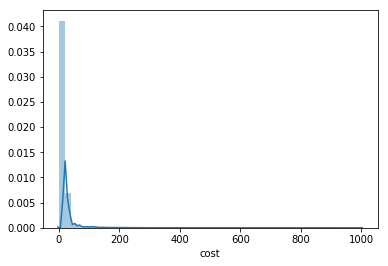

In [110]:
#Let's visualize our distribution before we log transform the regression target.

%matplotlib inline

import seaborn as sns

sns.distplot(y_train);

#By visualizing, we clearly see the right-skew.

In [111]:
#An important thing to note: Logarithms are like an undo for exponentiation.

#To demonstrate...

print(2**3)

print(np.log2(8))

#We see that it is like undoing the operation.

8
3.0


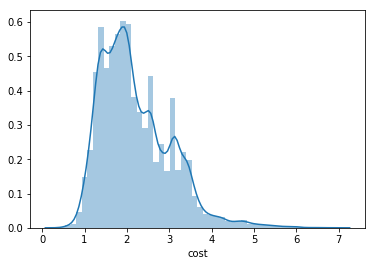

In [112]:
#Let's apply this to our training labels and plot it as well.
#Compare to the visualization above.

y_train_log = np.log1p(y_train)
sns.distplot(y_train_log);

#Cost is now represented in log dollars.

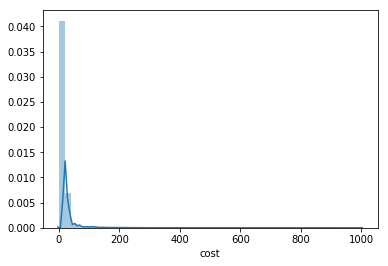

In [113]:
#Transforming it would return the plot back to what it initially looked like.

y_train_log_exp = np.expm1(y_train_log)

sns.distplot(y_train_log_exp);

Let's now refit our model after log transforming our target!

In [114]:
y_train_log = np.log1p(y_train)

model.fit(X_train, y_train_log)

y_pred_log = model.predict(X_val) #These predictions are in log dollars.

#Converting back to the original units.

y_pred = np.expm1(y_pred_log)

print('Validation RMSLE for Random Forest Regressor with 1 Feature and Log Transformed Target:', rmsle(y_val, y_pred))

#We observe that this error is lower. Also, remember that this error is also in terms of our original units as we converted it back just above.

Validation RMSLE for Random Forest Regressor with 1 Feature and Log Transformed Target: 0.622925465880199


In [115]:
#RMSLE with original targets = RMSE with log transformed targets

from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
  return np.sqrt(mean_squared_error(y_true, y_pred))

#Log transform the validation target as well.

y_val_log = np.log1p(y_val)

rmse(y_val_log, y_pred_log) #This is in terms of log dollars!

#Notice that this is the same as the RMSLE number with a log transformed target.  

0.622925465880199

We are looking to select more features now...

In [116]:
!pip install category_encoders

In [117]:
#Let's remind ourselves what features we have available to us.

train.head()

,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity,cost
8,TA-00004,S-0066,2013-07-07,0,0,Yes,1,21.972702
9,TA-00004,S-0066,2013-07-07,0,0,Yes,2,12.407983
10,TA-00004,S-0066,2013-07-07,0,0,Yes,5,6.668596
11,TA-00004,S-0066,2013-07-07,0,0,Yes,10,4.754539
12,TA-00004,S-0066,2013-07-07,0,0,Yes,25,3.608331


In [0]:
#We are going to engineer some features off of the quote_date.

#We'll create a wrangle function to do this.

def wrangle(X):
  
  X = X.copy()
  
  #Engineer features off of quote_date.
  
  X['quote_date'] = pd.to_datetime(X['quote_date'], infer_datetime_format=True)   #Convert quote date to date time.
  X['quote_date_year'] = X['quote_date'].dt.year     #Create a column for quote date year.
  X['quote_date_month'] = X['quote_date'].dt.year    #Create a column for quote date month.
  X = X.drop(columns='quote_date')                   #We'll drop quote_date after extracting the information we needed.
    
  #Drop the tube_assembly_id feature as our goal is to predict unknown assemblies. We have different assemblies in our train, val and test sets which makes tube_assembly_id not a useful feature. 
  
  X = X.drop(columns='tube_assembly_id')
  
  return X

In [0]:
#We'll apply our wrangle function to our train and val sets.

train_wrangled = wrangle(train)
val_wrangled = wrangle(val)

In [120]:
features = train_wrangled.columns.drop(target)

print('Features:', features.tolist())

#Here we see all the features we'll be using.

Features: ['supplier', 'annual_usage', 'min_order_quantity', 'bracket_pricing', 'quantity', 'quote_date_year', 'quote_date_month']


In [0]:
#Define X_train and X_val after performing our feature engineering.

X_train = train_wrangled[features]

X_val = val_wrangled[features]

In [122]:
#Create a pipeline.

import category_encoders as ce
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(ce.OrdinalEncoder(), RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))

pipeline.fit(X_train, y_train_log)
y_pred_log = pipeline.predict(X_val) #Again, these are predictions in terms of log dollars.

print('Validation RMSE:', rmse(y_val_log, y_pred_log))

Validation RMSE: 0.4072194838269549


In [123]:
#Converting in terms of original units.

y_pred = np.expm1(y_pred_log)

rmsle(y_val, y_pred)

0.4072194838269549

**Take a look at our feature importances.**

In [124]:
random_forest = pipeline.named_steps['randomforestregressor']
feature_importances = pd.Series(random_forest.feature_importances_, X_train.columns)
feature_importances.sort_values()

#We see that quantity is associated with much more feature importance than our other features. The trees in this Random Forest split on quantity more often and earlier.

bracket_pricing       0.008718
quote_date_year       0.047290
min_order_quantity    0.047698
quote_date_month      0.053194
supplier              0.108763
annual_usage          0.185907
quantity              0.548431
dtype: float64

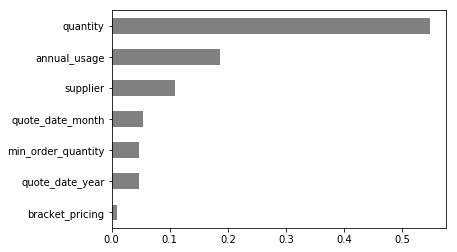

In [125]:
#And to plot this out...

feature_importances.sort_values().plot.barh(color='grey');

**We can continue to improve our model by feature engineering with relational data!**

In [0]:
#We may not mean feature engineering in the strict sense in this case such as through creating/engineering new columns,
#but in being able to merge on columns you already have from those relational tables.

In [127]:
#Taking a look at what columns some of our other files may have in common with our train set.

for path in glob('competition_data/*.csv'):
    df = pd.read_csv(path)
    shared_columns = set(df.columns) & set(train.columns)
    if shared_columns:
        print(path, df.shape)
        print(df.columns.tolist(), '\n')
        
#The files that have at least one shared column with the train set are returned.

competition_data/tube.csv (21198, 16)
['tube_assembly_id', 'material_id', 'diameter', 'wall', 'length', 'num_bends', 'bend_radius', 'end_a_1x', 'end_a_2x', 'end_x_1x', 'end_x_2x', 'end_a', 'end_x', 'num_boss', 'num_bracket', 'other'] 

competition_data/train_set.csv (30213, 8)
['tube_assembly_id', 'supplier', 'quote_date', 'annual_usage', 'min_order_quantity', 'bracket_pricing', 'quantity', 'cost'] 

competition_data/test_set.csv (30235, 8)
['id', 'tube_assembly_id', 'supplier', 'quote_date', 'annual_usage', 'min_order_quantity', 'bracket_pricing', 'quantity'] 

competition_data/bill_of_materials.csv (21198, 17)
['tube_assembly_id', 'component_id_1', 'quantity_1', 'component_id_2', 'quantity_2', 'component_id_3', 'quantity_3', 'component_id_4', 'quantity_4', 'component_id_5', 'quantity_5', 'component_id_6', 'quantity_6', 'component_id_7', 'quantity_7', 'component_id_8', 'quantity_8'] 

competition_data/specs.csv (21198, 11)
['tube_assembly_id', 'spec1', 'spec2', 'spec3', 'spec4', 'spec

In [0]:
#We see that bill_of_materials, specs and tube are files we have yet to use for our model.

In [0]:
#Let's start with the tube.csv.

tube = pd.read_csv('competition_data/tube.csv')

In [130]:
#We can learn more about what is in this file.

#Numeric features

tube.describe()

,diameter,wall,length,num_bends,bend_radius,num_boss,num_bracket,other
count,21198.000000,21198.000000,21198.000000,21198.000000,21198.000000,21198.000000,21198.000000,21198.000000
mean,23.687764,1.578402,100.312844,3.748137,49.350767,0.044485,0.006746,0.022644
std,25.396277,0.745749,70.542771,2.265405,196.468480,0.260737,0.100015,0.199676
min,3.180000,0.710000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.520000,0.890000,48.000000,2.000000,19.050000,0.000000,0.000000,0.000000
50%,15.880000,1.650000,86.000000,3.000000,38.100000,0.000000,0.000000,0.000000
75%,25.400000,1.650000,135.000000,5.000000,50.800000,0.000000,0.000000,0.000000
max,203.200000,7.900000,1333.000000,17.000000,9999.000000,5.000000,5.000000,8.000000


In [131]:
#Non-numeric features

tube.describe(exclude='number')

,tube_assembly_id,material_id,end_a_1x,end_a_2x,end_x_1x,end_x_2x,end_a,end_x
count,21198,20919,21198,21198,21198,21198,21198,21198
unique,21198,19,2,2,2,2,25,27
top,TA-04872,SP-0029,N,N,N,N,EF-003,EF-003
freq,1,11488,20118,18015,20377,18493,11388,10863


In [0]:
#We are going to use our wrangle function from earlier to do a little feature engineering and also merge our tube data with the train and val sets.
def wrangle(X):
  
  X = X.copy()
  
  #Engineer features off of quote_date.
  
  X['quote_date'] = pd.to_datetime(X['quote_date'], infer_datetime_format=True)   #Convert quote date to date time.
  X['quote_date_year'] = X['quote_date'].dt.year     #Create a column for quote date year.
  X['quote_date_month'] = X['quote_date'].dt.year    #Create a column for quote date month.
  X = X.drop(columns='quote_date')                   #We'll drop quote_date after extracting the information we needed.
  
  #Merge the tube data.
  
  tube = pd.read_csv('competition_data/tube.csv')
  X = X.merge(tube, how='left')
    
  #Drop the tube_assembly_id feature as our goal is to predict unknown assemblies. We have different assemblies in our train, val and test sets which makes tube_assembly_id not a useful feature. 
  
  X = X.drop(columns='tube_assembly_id')
  
  return X

In [0]:
train_wrangled = wrangle(train)
val_wrangled = wrangle(val)

In [134]:
#We can verify that the tube data has been merged by looking at the shape and head of our train_wrangled and val_wrangled sets.

train_wrangled.shape, val_wrangled.shape

#We see that additional columns have been added.

((22628, 23), (7585, 23))

In [135]:
#We verify that additional columns have been added this way as well.

train_wrangled.head()

,supplier,annual_usage,min_order_quantity,bracket_pricing,quantity,cost,quote_date_year,quote_date_month,material_id,diameter,wall,length,num_bends,bend_radius,end_a_1x,end_a_2x,end_x_1x,end_x_2x,end_a,end_x,num_boss,num_bracket,other
0,S-0066,0,0,Yes,1,21.972702,2013,2013,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0
1,S-0066,0,0,Yes,2,12.407983,2013,2013,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0
2,S-0066,0,0,Yes,5,6.668596,2013,2013,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0
3,S-0066,0,0,Yes,10,4.754539,2013,2013,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0
4,S-0066,0,0,Yes,25,3.608331,2013,2013,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0


In [136]:
#Now for training our model using this data.

X_train = train_wrangled.drop(columns=target)

X_val = val_wrangled.drop(columns=target)

#Create a pipeline.

pipeline = make_pipeline(ce.OrdinalEncoder(), RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))

pipeline.fit(X_train, y_train_log)
y_pred_log = pipeline.predict(X_val) #Again, these are predictions in terms of log dollars.

print('Validation RMSE:', rmse(y_val_log, y_pred_log))

#We observe a lower error!

Validation RMSE: 0.30501096913378545


**Module 2**

**XGboost for Gradient Boosting**

In [137]:
from xgboost import XGBRegressor

#Create a pipeline.

pipeline = make_pipeline(ce.OrdinalEncoder(), XGBRegressor(n_estimators=100, n_jobs=-1))

pipeline.fit(X_train, y_train_log)

y_pred_log = pipeline.predict(X_val)

print('Validation RMSE:', rmse(y_val_log, y_pred_log))

#Notice that we have a higher validation error than our Random Forest model.

[04:37:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation RMSE: 0.34958624168085045


In [138]:
#What if we increase the number of estimators by 10 times?

pipeline = make_pipeline(ce.OrdinalEncoder(), XGBRegressor(n_estimators=1000, n_jobs=-1))

pipeline.fit(X_train, y_train_log)

y_pred_log = pipeline.predict(X_val)

print('Validation RMSE:', rmse(y_val_log, y_pred_log))

[04:37:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation RMSE: 0.2951322331403255


In [0]:
#We observe a lower validation error.

Avoid and prevent overfitting by using **early stopping**!

In [140]:
#It's hard to implement this using a pipeline, so we'll do it this way...

import category_encoders as ce
from xgboost import XGBRegressor

encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

eval_set = [(X_train_encoded, y_train_log), (X_val_encoded, y_val_log)]

model = XGBRegressor(n_estimators=1000, n_jobs=-1)
model.fit(X_train_encoded, y_train_log, early_stopping_rounds=10, eval_metric='rmse', eval_set=eval_set) #If after 10 rounds our error hasn't improved we'd consider that to be plateauing and so the model stops.

[04:37:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1.71924	validation_1-rmse:1.70846
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:1.56516	validation_1-rmse:1.55498
[2]	validation_0-rmse:1.42805	validation_1-rmse:1.41868
[3]	validation_0-rmse:1.30379	validation_1-rmse:1.29472
[4]	validation_0-rmse:1.19233	validation_1-rmse:1.18372
[5]	validation_0-rmse:1.09432	validation_1-rmse:1.08627
[6]	validation_0-rmse:1.00669	validation_1-rmse:0.999137
[7]	validation_0-rmse:0.930868	validation_1-rmse:0.923643
[8]	validation_0-rmse:0.862939	validation_1-rmse:0.856299
[9]	validation_0-rmse:0.803185	validation_1-rmse:0.796445
[10]	validation_0-rmse:0.751263	validation_1-rmse:0.745281
[11]	validation_0-rmse:0.706111	validation_1-rmse:0.70065
[12]	validation_0-rmse:0.66484

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

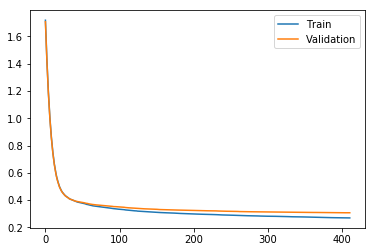

In [141]:
#If we wanted to plot these results...

import matplotlib.pyplot as plt

results = model.evals_result()
train_rmse = results['validation_0']['rmse']
val_rmse = results['validation_1']['rmse']
unit_of_time = range(len(train_rmse))

plt.plot(unit_of_time, train_rmse, label='Train')
plt.plot(unit_of_time, val_rmse, label='Validation')
plt.legend();

**3 types of Model Explanations**

#### 1. Global model explanation: all features in relation to each other
- Feature Importances: _Default, fastest, good for first estimates_
- Drop-Column Importances: _The best in theory, but much too slow in practice_
- Permutaton Importances: _A good compromise!_

#### 2. Global model explanation: individual feature(s) in relation to target
- Partial Dependence plots

#### 3. Individual prediction explanation
- Shapley Values

_Note that the coefficients from a linear model give you all three types of explanations!_

**Permutation Importance**- What features does your model think are important?

**Partial Plots**- How does each feature affect your predictions?

**Shapley(SHAP) Values**- Understanding individual predictions.

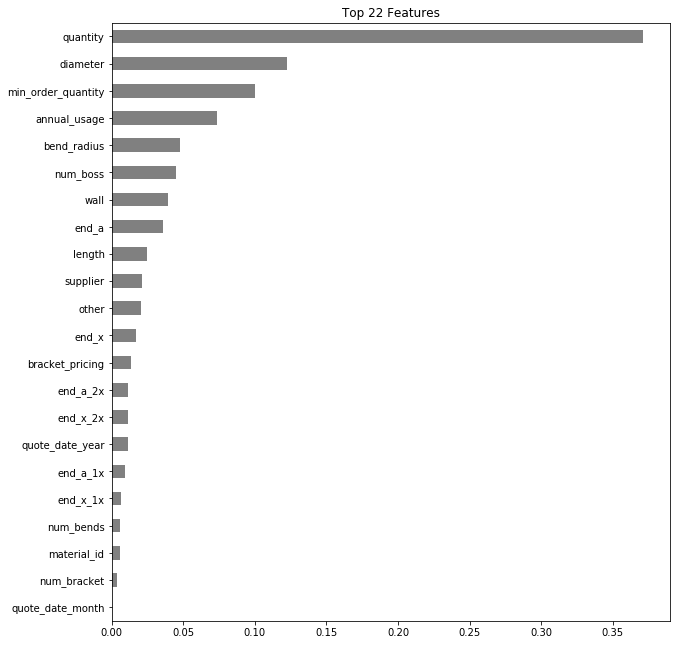

In [142]:
#Look at feature importances.

importances = pd.Series(model.feature_importances_, X_train_encoded.columns)

#Plot feature importances.

n = len(X_train_encoded.columns)
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} Features')
importances.sort_values()[-n:].plot.barh(color='grey');

###**Permutation Importances**

In [143]:
!pip install eli5 pdpbox category_encoders

In [144]:
import eli5

from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(model, scoring='neg_mean_squared_error', cv='prefit', n_iter=2, random_state=42)

permuter.fit(X_val_encoded, y_val_log)
feature_names = X_val_encoded.columns.tolist()
eli5.show_weights(permuter, top=None, feature_names=feature_names)

#What is this saying?
#Sometimes it impacted your score a little less and a little more. Probablilistic estimate of the feature importance.
#Example: For the quantity feature, when we permute a quantity then in these two iterations one time it was .7200 + .0023 and the other it was .7200 - .0023.

Weight,Feature
0.7200 ± 0.0023,quantity
0.2228 ± 0.0016,min_order_quantity
0.0817 ± 0.0013,diameter
0.0685 ± 0.0015,end_a
0.0661 ± 0.0022,annual_usage
0.0512 ± 0.0056,supplier
0.0456 ± 0.0018,end_x
0.0318 ± 0.0005,quote_date_year
0.0226 ± 0.0001,length
0.0154 ± 0.0005,wall


###**Partial Dependence Plots**

**1 Feature**

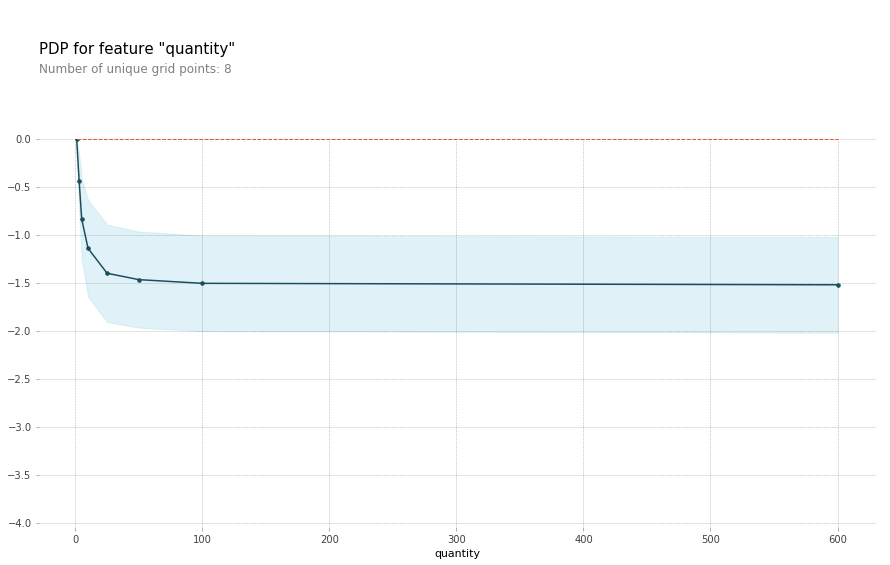

In [146]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'quantity'

isolated = pdp_isolate(model=model, dataset=X_val_encoded, model_features=X_val_encoded.columns, feature=feature)

pdp_plot(isolated, feature_name=feature);

**2 Features (to see interactions)**

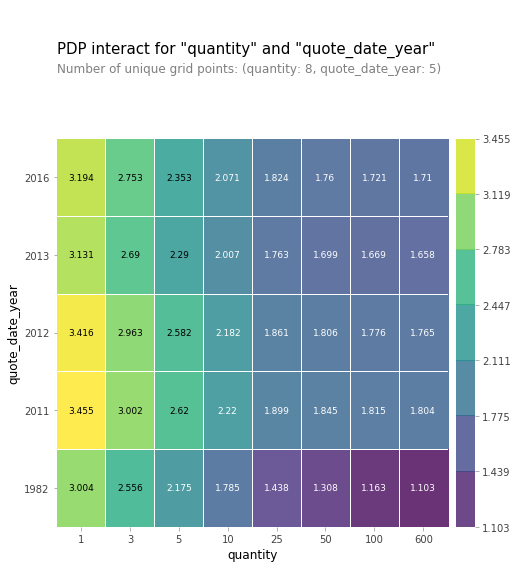

In [148]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['quantity', 'quote_date_year']

interaction = pdp_interact(model=model, dataset=X_val_encoded, model_features=X_val_encoded.columns, features=features)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);